In [10]:
import glob
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dataset = 'conll2003'
supervised_results = {
    'conll2003': [93.72628304430663, 0.4236196517888068 ],
    'ontonotes': [85.40089858116333, 0.47536216945453025],
}
mean, std = supervised_results[dataset]
files = glob.glob(f'/home/rvacareanu/projects_5_22/odinsynth_al/results/221229/{dataset}/*.jsonl')
data = []
for f in [x for x in files if 'sentence' in x]:
    with open(f) as fin:
        for line in fin:
            for it in json.loads(line):
                data.append({**it, 'f1': 100 * it['val_metrics']['test_overall_f1']})
# display(df)

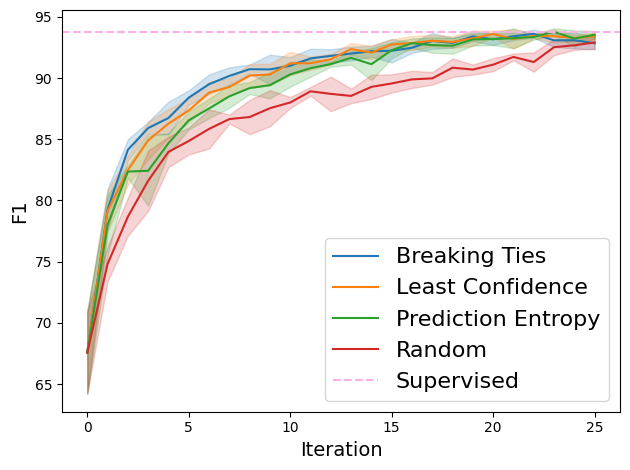

In [12]:
df = pd.DataFrame(data)



df['query_strategy_function'] = df['query_strategy_function'].replace({
    'breaking_ties_query'     : 'Breaking Ties', 
    'random_query'            : 'Random', 
    'least_confidence_query'  : 'Least Confidence', 
    'prediction_entropy_query': 'Prediction Entropy', 
    })
df.rename(columns={'query_strategy_function': 'Query Strategy'}, inplace=True)
# sns.lineplot(data=df[df['training_annotation_style'] == 'mask_all_unknown'], x='active_learning_iteration', y='f1', hue='Query Strategy', errorbar='sd', palette=['#0173b2', '#de8f05', '#029e73', '#d55e00'])
sns.color_palette("colorblind")
sns.lineplot(data=df[df['training_annotation_style'] == 'mask_all_unknown'], x='active_learning_iteration', y='f1', hue='Query Strategy', errorbar='sd', hue_order=['Breaking Ties', 'Least Confidence', 'Prediction Entropy', 'Random'])
plt.axhline(mean, 0, 1, label='Supervised', color='#fbafe4', linestyle='--')
# ax2 = plt.axes([0.1, 0.5, .8, .8], facecolor='y')
# df2 = df[df['training_annotation_style'] == 'mask_all_unknown']
# sns.lineplot(data=df2[((df2['active_learning_iteration'] > 15) & (df2['active_learning_iteration'] < 20))], x='active_learning_iteration', y='f1', hue='Query Strategy', errorbar='sd', hue_order=['Breaking Ties', 'Least Confidence', 'Prediction Entropy', 'Random'], ax=ax2)
# ax2.set_title('zoom')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel('F1', fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()